In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from epidemic_one_dim import Epidemic_1D
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

mpl.rcParams['figure.dpi'] = 300
cmap = mpl.colormaps['autumn']
patch_pop = 1000
number_of_patches = 50
t_max = 120
t_delta = 1 / 24

params = dict(n=patch_pop, t_max=t_max, k=number_of_patches, t_delta=t_delta)
p_a = 0.01
p_c = 0.2

In [4]:
n_samples = 15
adventurer_props = np.array([0, 0.01, 0.1])
n_points = len(adventurer_props)
alt_series = np.zeros(shape=(n_points, n_samples, number_of_patches))
alt_epidemic = Epidemic_1D(routine_type='simple_two', **params)

for point, p_a in enumerate(adventurer_props):
    # update routine parameters
    alt_epidemic.set_routine_params(dict(p_a=p_a, p_c=p_c))
    for sample in range(n_samples):
        print(point, sample)
        alt_res = alt_epidemic.simulate()
        alt_series[point, sample, :] = (alt_res[1].sum(axis=-1)).argmax(axis=0) * t_delta


0 0
Extinction event occurred, restarting
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
Extinction event occurred, restarting
0 13
Extinction event occurred, restarting
0 14
1 0
1 1
1 2
Extinction event occurred, restarting
1 3
1 4
1 5
1 6
1 7
1 8
1 9
Extinction event occurred, restarting
1 10
1 11
1 12
Extinction event occurred, restarting
Extinction event occurred, restarting
1 13
1 14
2 0
2 1
2 2
2 3
Extinction event occurred, restarting
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14


In [114]:
epi = Epidemic_1D(routine_type='simple_two', **params)
epi.set_routine_params(dict(p_1=0.5))
epi_sim = epi.simulate()
epi.set_routine_params(dict(p_a=0.001))
epi_sim_ad = epi.simulate()

Extinction event occurred, restarting


NameError: name 'epi_sim' is not defined

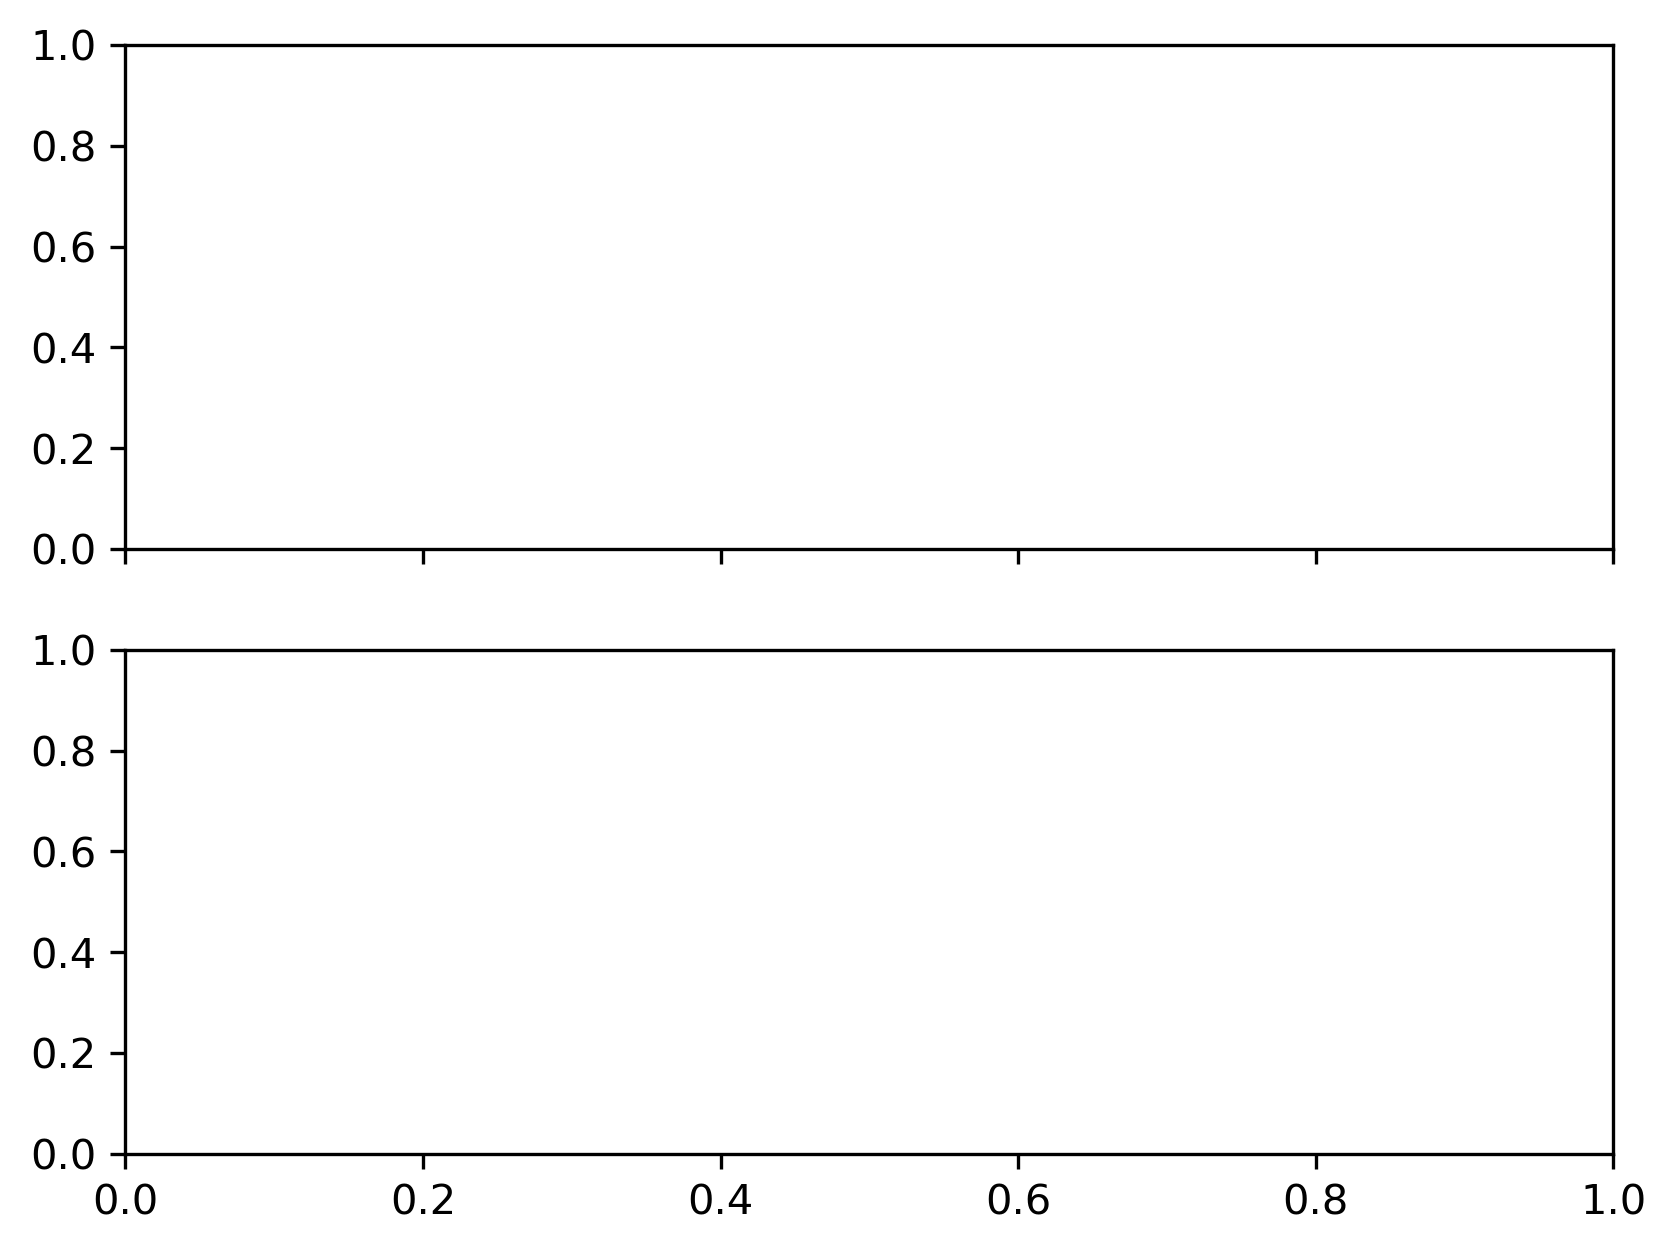

In [4]:
colors = cmap(np.linspace(0, 1, number_of_patches))
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
for i in range(number_of_patches):
    param = dict(color=colors[i], linewidth=0.8)
    ax[0].plot(epi_sim[-1], epi_sim[1][:, i, :].sum(axis=-1) / patch_pop, **param)
    ax[1].plot(epi_sim_ad[-1], epi_sim_ad[1][:, i, :].sum(axis=-1) / patch_pop, **param)
ax[0].set_title('2 neighbour commuters')
ax[1].set_title('2 neighbours commuters + evening trips')
fig.tight_layout()
plt.show()

In [116]:
base_series = epi_sim[1].sum(axis=-1) / patch_pop
ad_series = epi_sim_ad[1].sum(axis=-1) / patch_pop

In [125]:
alt_series.shape

(5, 5, 50)

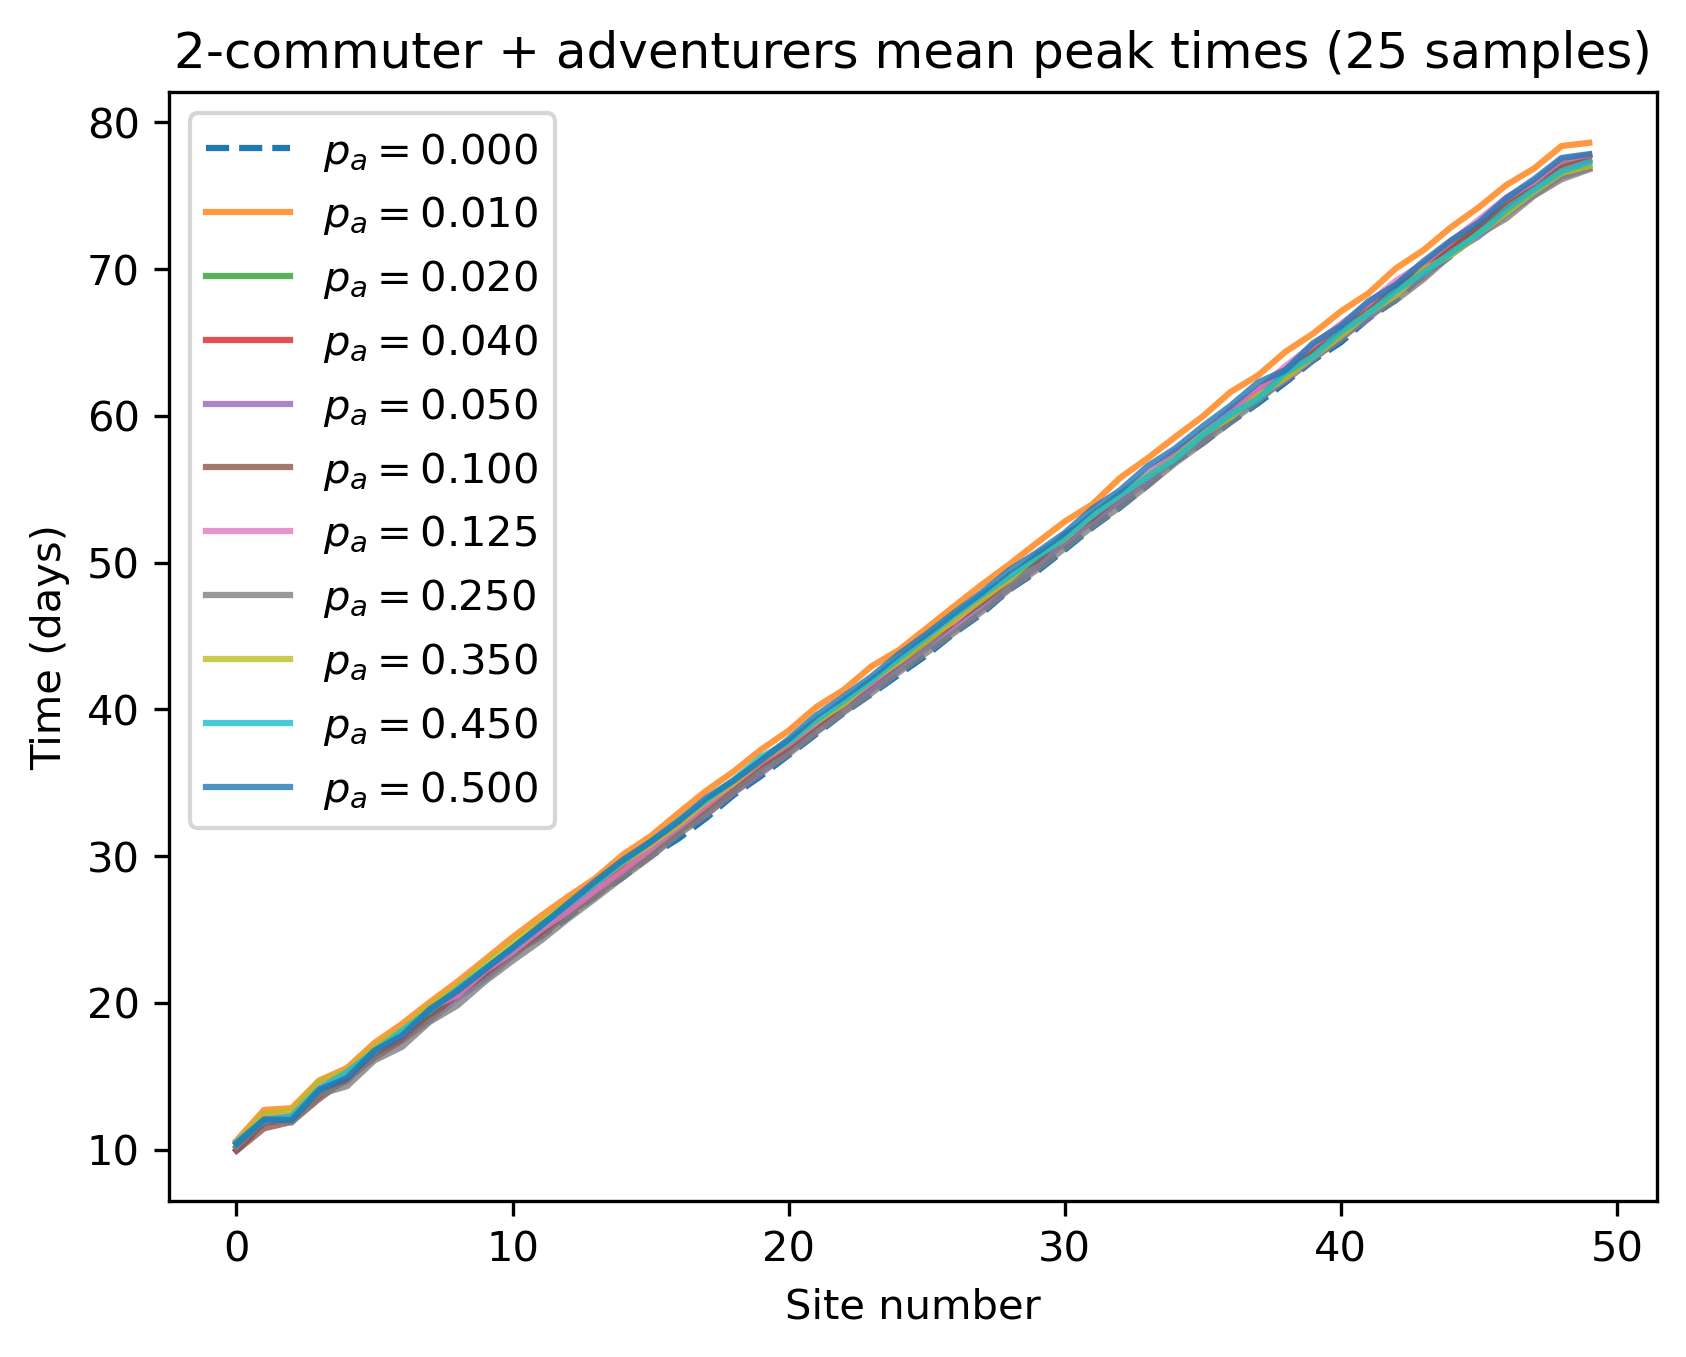

In [5]:
plt.plot(np.mean(alt_series[0, :, :], axis=0), label=f'$p_a={adventurer_props[0]:.3f}$', linestyle='--')
for i in range(1, len(adventurer_props)):
    plt.plot(np.mean(alt_series[i, :, :], axis=0), label=f'$p_a={adventurer_props[i]:.3f}$', alpha=0.8)
plt.legend()
plt.title(f'2-commuter + adventurers mean peak times ({n_samples} samples)')
plt.xlabel('Site number')
plt.ylabel('Time (days)')
plt.show()

In [ ]:
# check variance of samples, and then plot wavespeed vs p_a

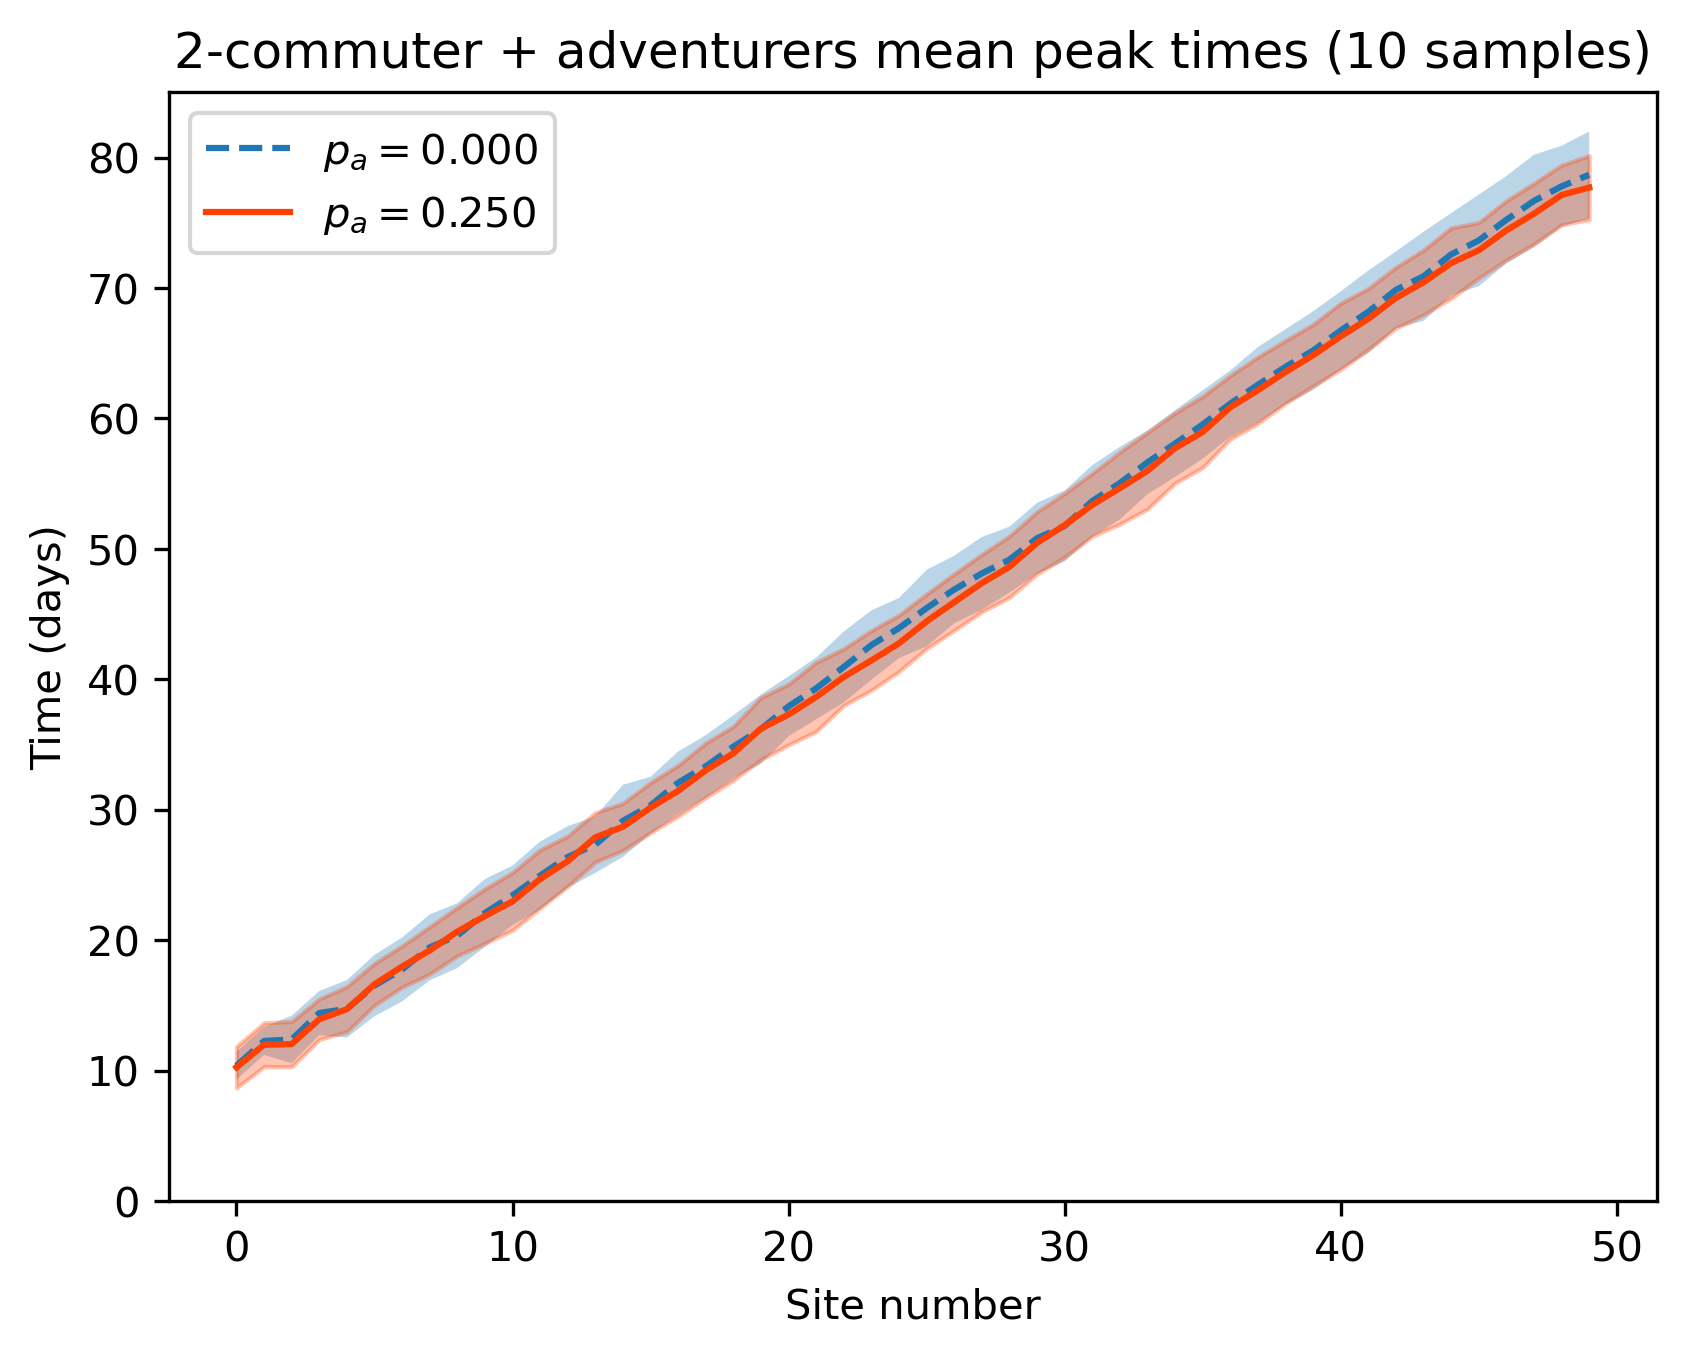

In [189]:
comparison = 5
adventure_colors = cmap(adventurer_props)
mean = np.mean(alt_series[0, :, :], axis=0)
std = np.std(alt_series[0, :, :], axis=0)
plt.plot(np.mean(alt_series[0, :, :], axis=0), label=f'$p_a={adventurer_props[0]:.3f}$', linestyle='--')
plt.fill_between(np.arange(number_of_patches), mean + std, mean - std, alpha=0.3)

alt_mean = np.mean(alt_series[comparison, :, :], axis=0)
alt_std = np.std(alt_series[comparison, :, :], axis=0)
plt.plot(np.mean(alt_series[comparison, :, :], axis=0), label=f'$p_a={adventurer_props[comparison]:.3f}$',
         color=adventure_colors[comparison])
plt.fill_between(np.arange(number_of_patches), alt_mean + alt_std, alt_mean - alt_std, alpha=0.3,
                 color=adventure_colors[comparison])

plt.legend()
plt.title(f'2-commuter + adventurers mean peak times ({n_samples} samples)')
plt.xlabel('Site number')
plt.ylabel('Time (days)')
plt.ylim(0, 85)
plt.show()

In [19]:
large_alt_series = np.fromfile('alt_series.bin')
large_alt_series = large_alt_series.reshape((11,50,50))

(11, 50, 50)

In [21]:
slopes = []
for i in range(len(adventurer_props)):
    y = large_alt_series[i].flatten()
    x = np.repeat(np.arange(number_of_patches), 50)
    slope, intercept = np.polyfit(x, y, 1)
    slopes.append(slope)

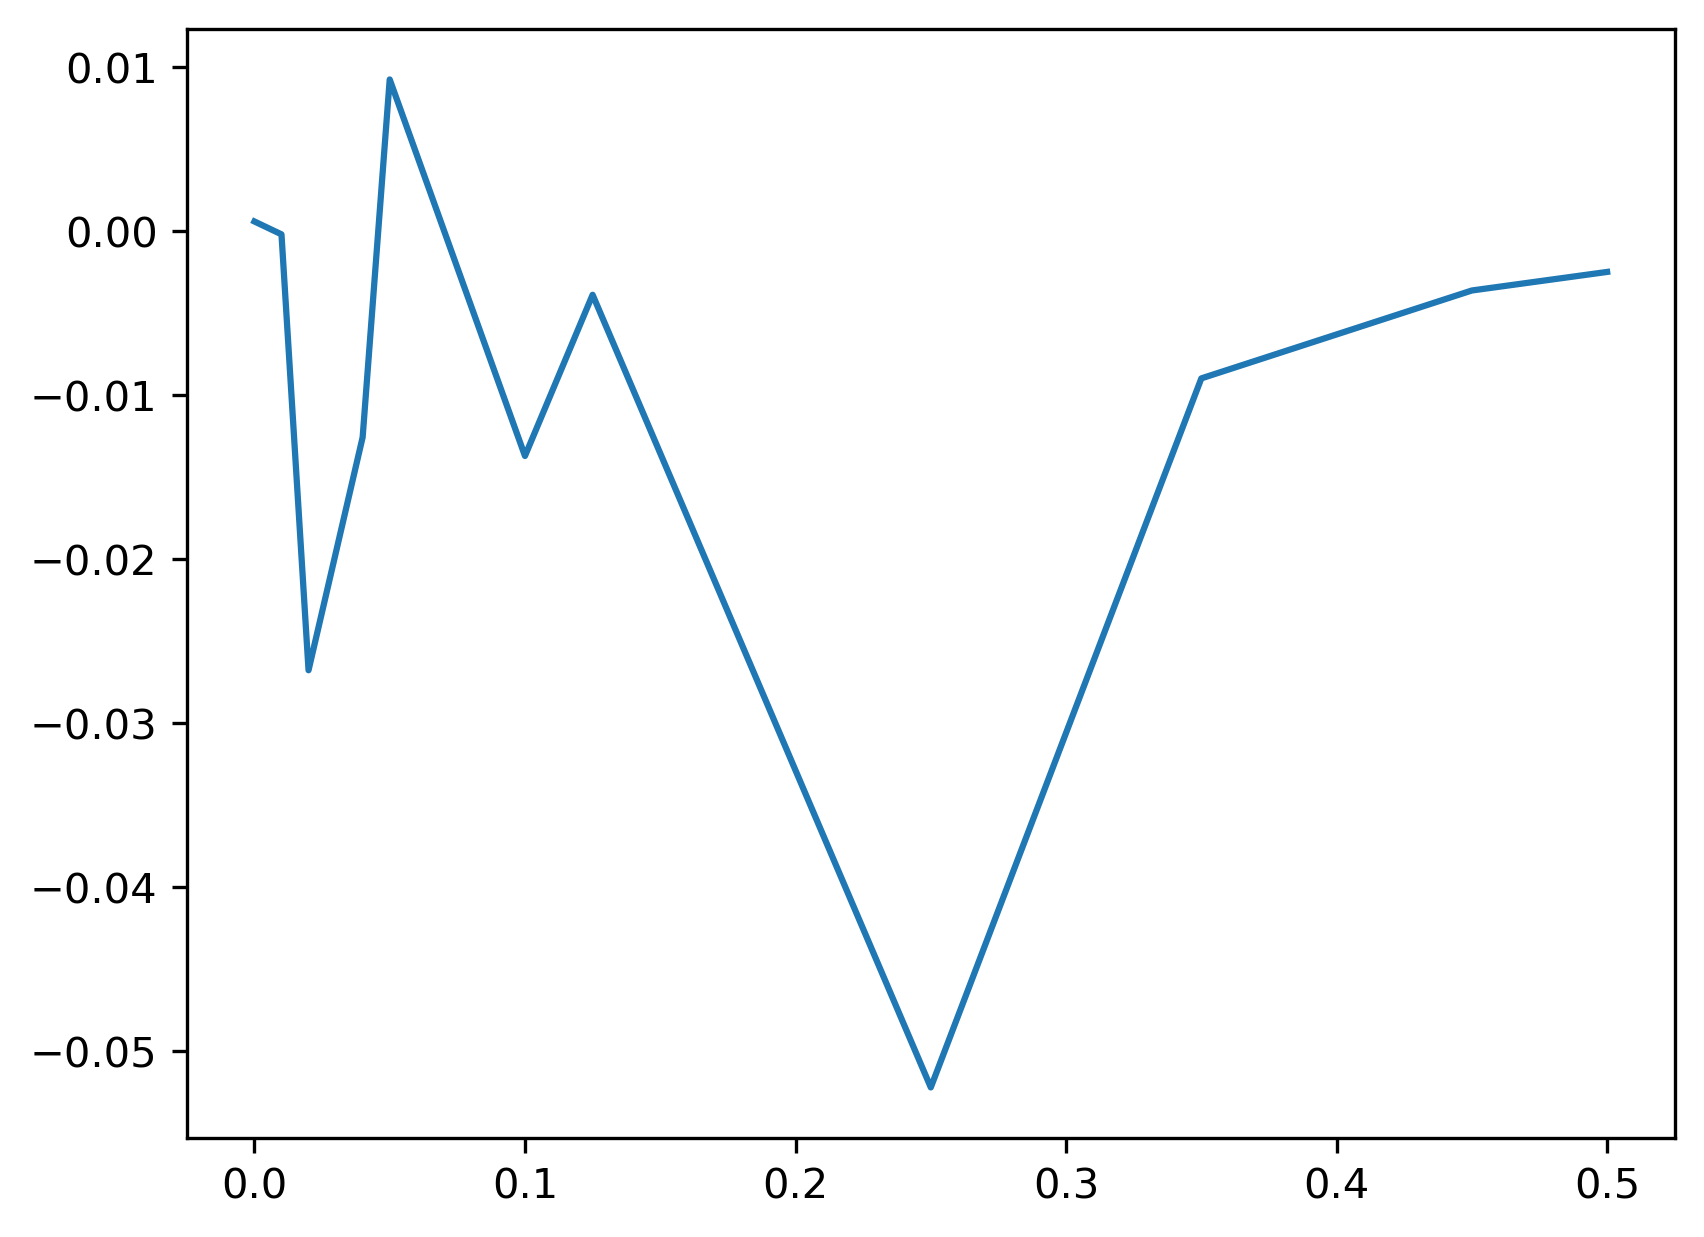

In [23]:
plt.plot(adventurer_props, slopes)
plt.show()